# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [4]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Target Variable Distribution

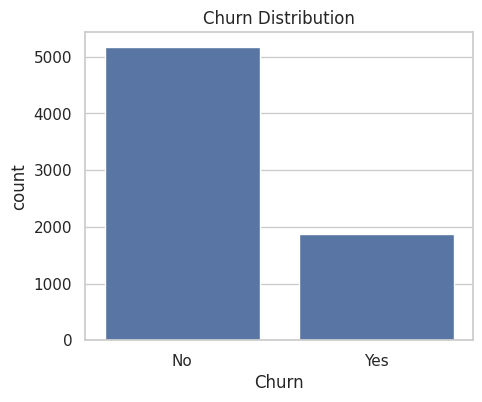

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(data=data, x="Churn")
plt.title("Churn Distribution")
plt.show()

In [10]:
data["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


Convert total charges to numeric

In [11]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')


check missing values again

In [12]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Filling missing **values**

In [14]:
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [15]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **Data Visualization**

**Tenure vs Churn**

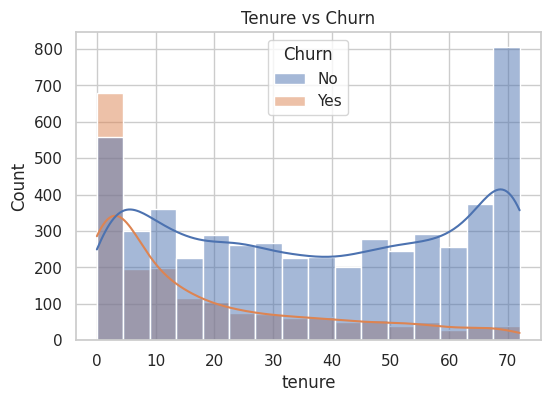

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data=data, x="tenure", hue="Churn", kde=True)
plt.title("Tenure vs Churn")
plt.show()

**Monthly Charges vs Churn**

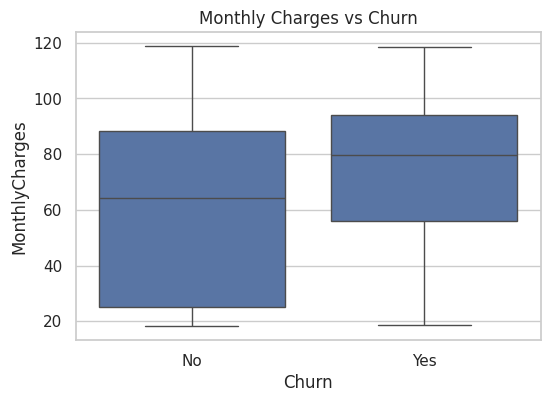

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()

Contract Type vs Churn

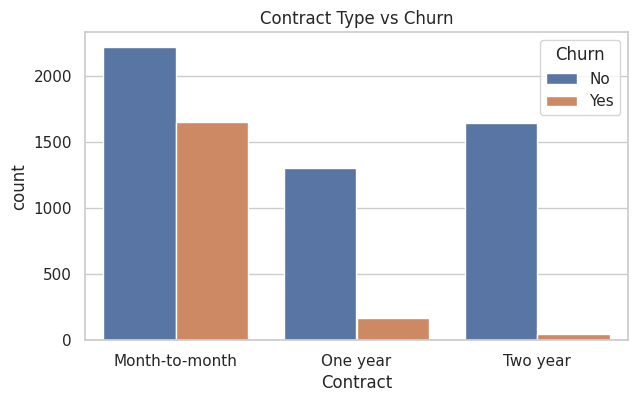

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(data=data, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.show()

Payment Method vs Churn

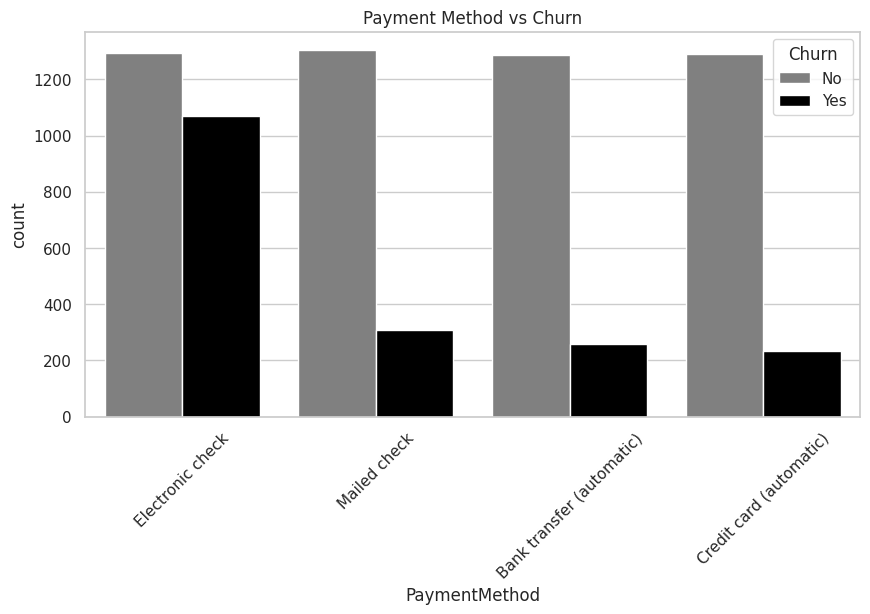

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="PaymentMethod", hue="Churn", palette=["grey", "black"])
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

Internet Service vs Churn

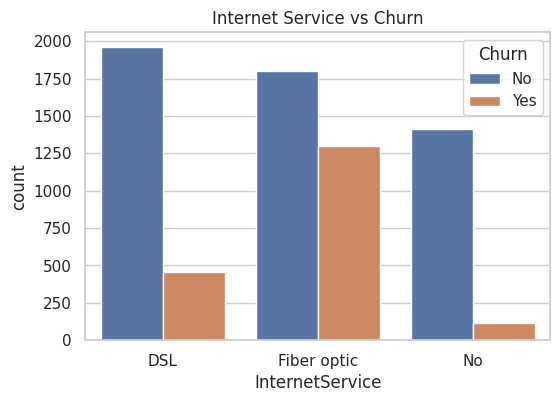

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="InternetService", hue="Churn")
plt.title("Internet Service vs Churn")
plt.show()


Heat Map

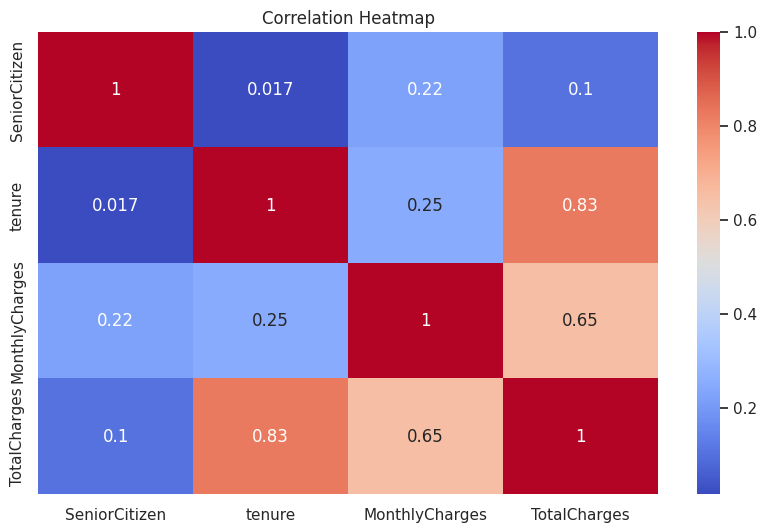

In [23]:
num_data = data.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

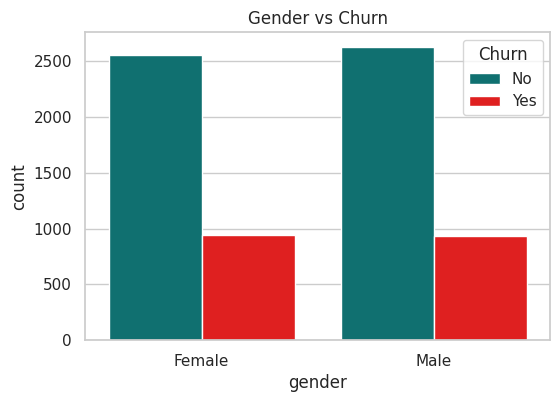

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="gender", hue="Churn", palette=["teal", "red"])
plt.title("Gender vs Churn")
plt.show()

Senior Citizen vs Churn

In [34]:
churn_counts = data.groupby('SeniorCitizen')['Churn'].value_counts().unstack()

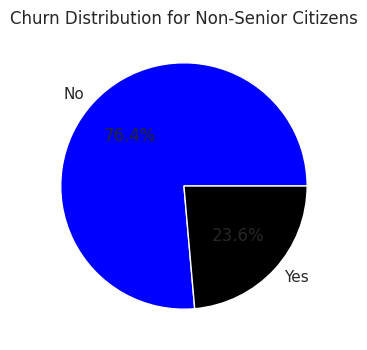

In [35]:
plt.figure(figsize=(6,4))
plt.pie(churn_counts.loc[0], labels=churn_counts.columns, autopct='%1.1f%%', colors=['blue','black'])
plt.title("Churn Distribution for Non-Senior Citizens")
plt.show()